## Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel(r"C:\Users\hp\Downloads\CART.xlsx")
df

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [3]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [4]:
df['age_n'] = le_age.fit_transform(df['age'])
df['income_n'] = le_income.fit_transform(df['income'])
df['student_n'] = le_student.fit_transform(df['student'])
df['credit_rating_n'] = le_credit_rating.fit_transform(df['credit_rating'])
df['buys_computer_n'] = le_buys_computer.fit_transform(df['buys_computer'])

In [5]:
df.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [6]:
df_new = df.drop(['age','income','student','credit_rating','buys_computer'], axis='columns')
df_new.head()

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [7]:
feature_cols = ['age_n', 'income_n', 'student_n', 'credit_rating_n']
x = df_new.drop(['buys_computer_n', 'RID'], axis='columns')
y = df_new['buys_computer_n']

In [8]:
x.head()    # Independent variables.

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1


In [9]:
y.head()   # Dependent variable

0    0
1    0
2    1
3    1
4    1
Name: buys_computer_n, dtype: int32

### Build the Decision Tree Model without Splitting

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x,y)
dt

DecisionTreeClassifier()

#### Visualizing the Model

In [11]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

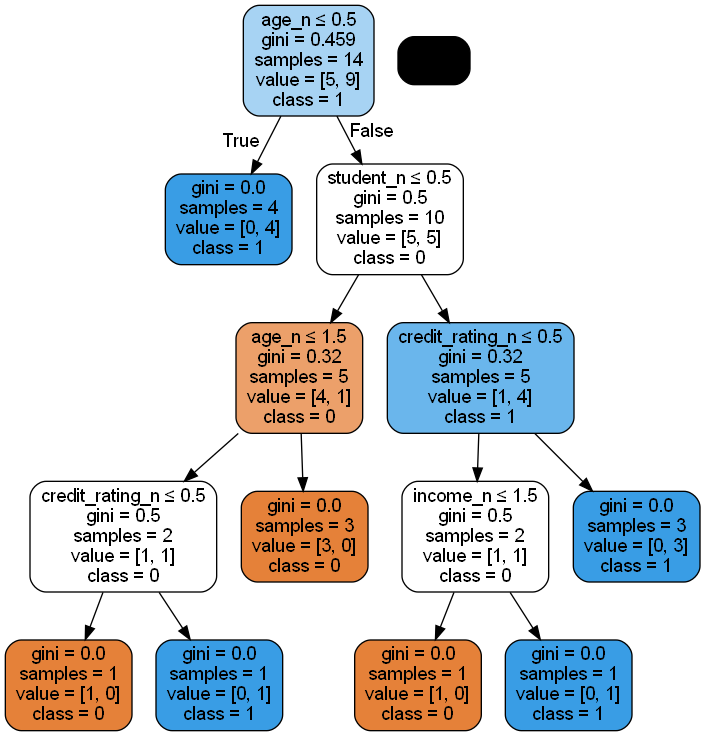

In [12]:
dot_df = StringIO()
export_graphviz(dt, out_file=dot_df,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_df.getvalue())
graph.write_png('Decision_Tree.png')

# To display the image in a Jupyter notebook
Image(graph.create_png())

### Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)
dt

DecisionTreeClassifier()

In [23]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

#### Evaluating the Model

In [24]:
from sklearn import metrics

In [25]:
y_pred = clf.predict(x_test)

In [26]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


#### Visualizing Decision Tree

In [27]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

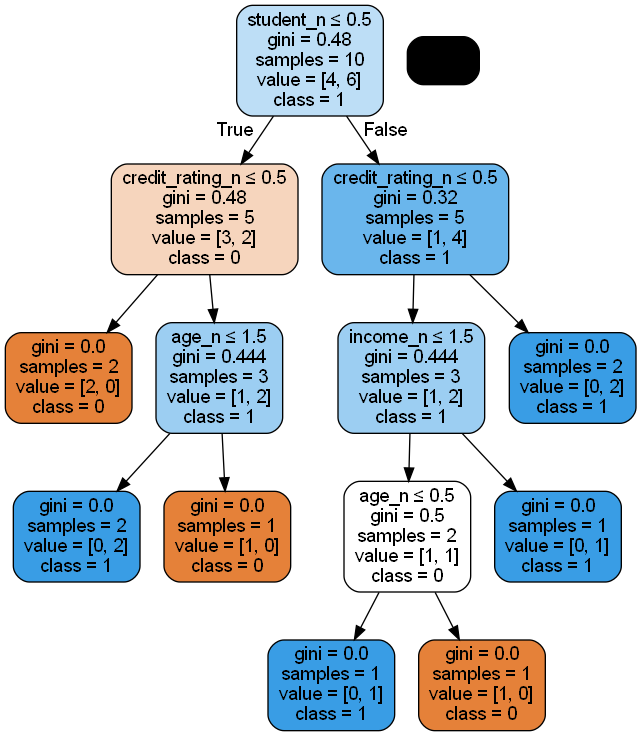

In [28]:
dot_df = StringIO()
export_graphviz(dt, out_file=dot_df,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_df.getvalue())
graph.write_png('Decision_Tree.png')

# To display the image in a Jupyter notebook
Image(graph.create_png())